In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Titanic Dataset

## Question 1.1 & 1.2
---
1.   Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.<br>
    a.   Do you think we should keep this feature?
2.   Do at least two visualizations to describe or show correlations.

In [3]:
data = pd.read_csv('train.csv', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


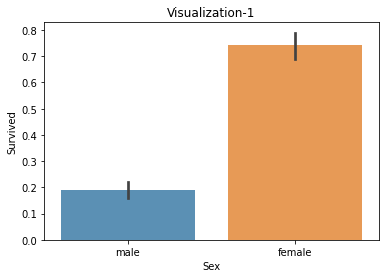

In [4]:
sns.barplot(x="Sex", y="Survived", data=data, alpha=0.8)
plt.title("Visualization-1")
plt.show()

In [5]:
female_survival = data['Survived'][data['Sex']=='female'].value_counts()
male_survival = data['Survived'][data['Sex']=='male'].value_counts()

print("Percentage of females survived:", round(female_survival[1]/female_survival.sum()*100, ndigits=2))
print("Percentage of males survived:", round(male_survival[1]/male_survival.sum()*100, ndigits=2))

Percentage of females survived: 74.2
Percentage of males survived: 18.89


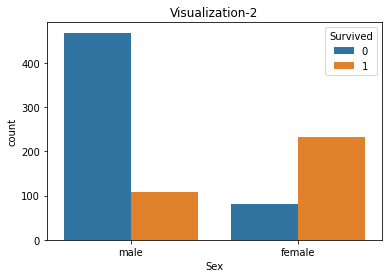

Count of male passengers: 577
Count of female passengers: 314


In [6]:
sns.countplot('Sex',hue='Survived',data=data)
plt.title('Visualization-2')
plt.show()

print('Count of male passengers:', len(data[data['Sex']=='male']))
print('Count of female passengers:', len(data[data['Sex']=='female']))

In [10]:
from sklearn.preprocessing import LabelEncoder

le_Sex = LabelEncoder().fit(data.Sex.unique())
classes_Sex = le_Sex.classes_
data['Sex'] = le_Sex.transform(data.Sex.values)

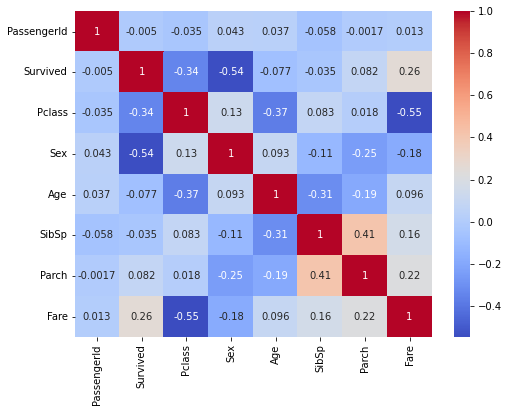

In [11]:
corr = data.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

From the above graphs and stats, we can make the following observations: 
1.  The percentage of female survivors are more than that of male survivors. 
2.  Though the count of male passengers is greater than the female passengers, the female survivors are almost double than that of male's.

From the above observations, it can be deduced that the 'female' gender had a better chance of survival over the 'male' gender. Because of this strong correlation, the 'Sex' column should not be discarded.

---

## Question 1.3
---
3.  Implement Naïve Bayes method using scikit-learn library and report the accuracy.

**Titanic Dataset column description:**

*  survival - Survival (0 = No; 1 = Yes)
*  class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*  name - Name
*  sex - Sex
*  age - Age
*  sibsp - Number of Siblings/Spouses Aboard
*  parch - Number of Parents/Children Aboard
*  ticket - Ticket Number
*  fare - Passenger Fare
*  cabin - Cabin
*  embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [12]:
# Feature Selection
df = data[['Survived','Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Dropping rows with null values
df = df.dropna(axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 50.1+ KB


In [13]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [14]:
# Preprocessing Categorical data
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

# Quantile discretization on "Age" feature
df['Age'] = pd.qcut(df['Age'], 8, labels=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    int64  
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 50.1 KB


In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,1
1,1,1,0,5,1,0,71.2833,2
2,1,3,0,3,0,0,7.9250,1
3,1,1,0,5,1,0,53.1000,1
4,0,3,1,5,0,0,8.0500,1


In [16]:
X = df.drop('Survived',axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=21)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [17]:
predictions = classifier.predict(X_test)
accuracy = accuracy_score(predictions, Y_test)

In [18]:
print('Naive Bayes classifier accuracy on test data:', accuracy*100)

Naive Bayes classifier accuracy on test data: 80.89887640449437


# 2. Glass Dataset

In [19]:
glass = pd.read_csv('glass.csv', header=0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [21]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [22]:
X = glass.drop('Type', axis=1)
Y = glass['Type']

In [23]:
Y.unique()

array([1, 2, 3, 5, 6, 7])

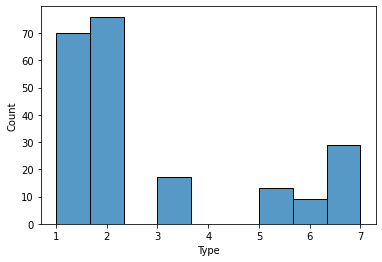

In [24]:
sns.histplot(Y)
plt.show()

Observation: Our glass dataset has more number of Type 1 & 2 examples and little to no examples for classes 3, 4, 5,& 6

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=11)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (149, 9)
Test set size: (65, 9)


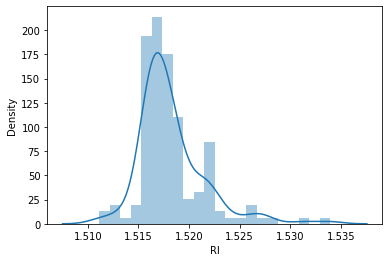

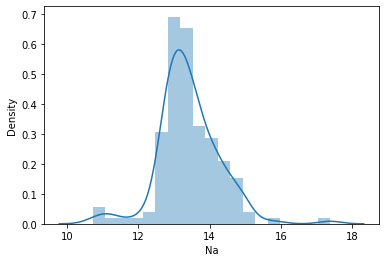

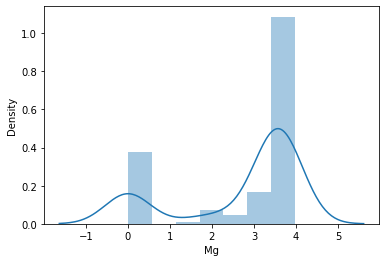

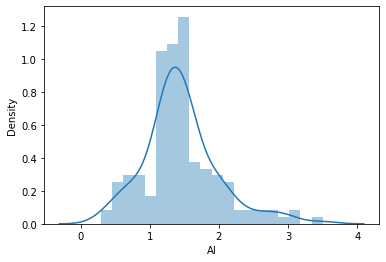

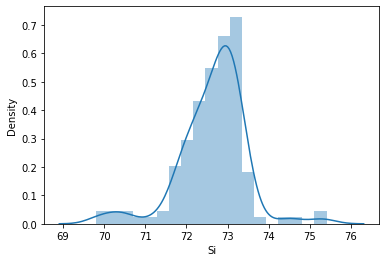

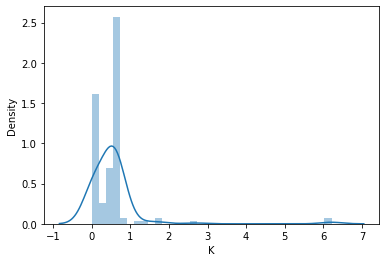

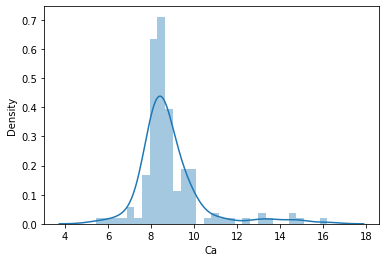

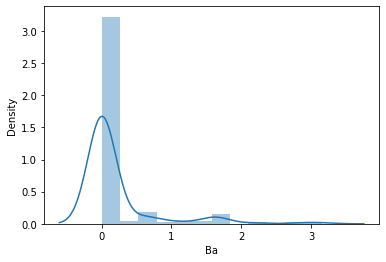

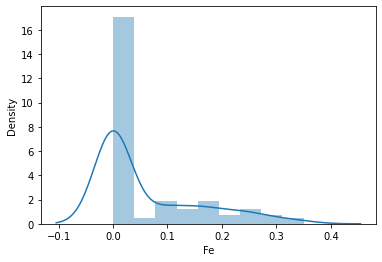

In [26]:
for col in X_train.columns:
    sns.distplot(X_train[col])
    plt.show()

Observations: 


*   Features - RI, Na, Al, Si, & Ca have a gaussian distribution 
*   Mg is the only non-gaussian feature in the dataset
*   Features - K, Ba, & Fe also have a normal distribution with a left-skew



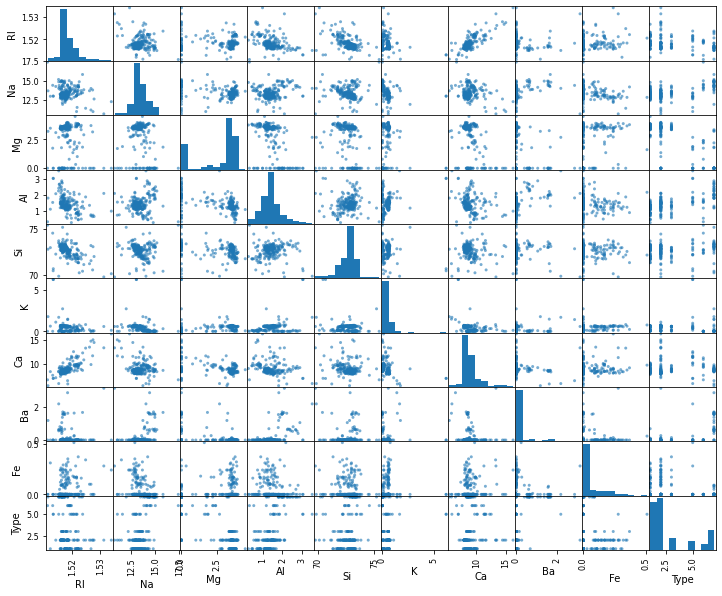

In [27]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
pd.plotting.scatter_matrix(glass, alpha=0.6, ax=ax)
plt.show()

Observations:

*  RI and Ca have a positive-linear correlation with each other.
*  RI and Si have a rather negative-linear correlation with each other
*  Almost all the features have a nearly gaussian distribution

## Training Naive Bayes classifier on Glass data




In [28]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

test_predictions = nb_classifier.predictD(X_test)
print('NB classifier\'s Accuracy score on Test set:', accuracy_score(test_predictions,Y_test)*100)
print('NB classifier\'s Classification Report:\n', classification_report(Y_test, test_predictions))

NB classifier's Accuracy score on Test set: 55.38461538461539
NB classifier's Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.67      0.65        27
           2       0.38      0.40      0.39        15
           3       0.00      0.00      0.00         6
           5       0.57      0.50      0.53         8
           6       0.60      1.00      0.75         3
           7       1.00      0.83      0.91         6

    accuracy                           0.55        65
   macro avg       0.53      0.57      0.54        65
weighted avg       0.54      0.55      0.55        65



## Training SVM classifier on Glass data

In [29]:
svc = SVC()
svc.fit(X_train, Y_train)

test_predictions = svc.predict(X_test)

print('SVM classifier\'s Accuracy score on Test set:', accuracy_score(test_predictions,Y_test)*100)
print('SVM classifier\'s Classification Report:\n', classification_report(Y_test, test_predictions))

SVM classifier's Accuracy score on Test set: 23.076923076923077
SVM classifier's Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.23      1.00      0.38        15
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         6

    accuracy                           0.23        65
   macro avg       0.04      0.17      0.06        65
weighted avg       0.05      0.23      0.09        65



From the above reports, we can see that the Naive Bayes classifier outperformed SVM classifier with an accuracy of ~55%.

This is because almost all the features in the dataset have a nearly gaussian distribution with a potential linear decision boundary. However, it has to be noted that the SVM classifier could perform better with some careful feature engineering and hyperparameter tuning.